In [3]:
import pandas as pd 
import numpy as np
%matplotlib inline

In [4]:
# does not read the csv file correctly for sleep; what do the columns mean when they're just numbers?
sleep_data = pd.read_csv('scripps1_sleep.csv')
motion_data = pd.read_csv('scripps1_motion.csv',sep=';')
ibi_data = pd.read_csv('scripps1_ibi.csv',sep=';')

# IBI Data 

In [67]:
# general view on the columns of the data 

ibi_data.head()

,Date,Time,Validity,Padded IBI,IBI,UTC time
0,27.11.2018,12:37:43,0,1312,1312.0,1.543351e+09
1,27.11.2018,12:37:43,1,980,980.0,1.543351e+09
2,27.11.2018,12:37:43,1,956,956.0,1.543351e+09
3,27.11.2018,12:37:43,1,1096,1096.0,1.543351e+09
4,27.11.2018,12:37:43,1,1172,1172.0,1.543351e+09


In [6]:
# look at the data types in each column 

ibi_data.dtypes

Date           object
Time           object
Validity        int64
Padded IBI      int64
IBI           float64
UTC time      float64
dtype: object

In [7]:
# general stats of the data 
ibi_data.describe()

,Validity,Padded IBI,IBI,UTC time
count,490083.000000,4.900830e+05,489848.000000,4.898480e+05
mean,1.197558,2.604982e+03,998.022182,1.543983e+09
std,0.551546,1.796191e+05,220.442680,3.788561e+05
min,-2.000000,0.000000e+00,0.000000,1.543351e+09
25%,1.000000,9.320000e+02,932.000000,1.543658e+09
50%,1.000000,1.012000e+03,1012.000000,1.543996e+09
75%,1.000000,1.104000e+03,1104.000000,1.544322e+09
max,15.000000,5.007400e+07,2000.000000,1.544629e+09


In [8]:
ibi_data.describe()['UTC time']['75%']

1544321582.0

In [9]:
# validity looked like it might possibly be an int that represents bool (0/1); however we find that there 
# are more than 2 unique values for validity, contradicting this theory. Large possibility that these are 
# removing the outliers (-1,-2,15 are all poor data)

ibi_data.Validity.unique()

array([ 0,  1,  2,  3, -1, 15, -2])

In [10]:
# exploring the different date/time groupings. Note how there are 3 measurements for every day/time. Also note 
# how date and time doesn't seem to influence validity, but validity affects whether IBI and UTC are recorded

test = ibi_data[(ibi_data['Date']==ibi_data.Date.unique()[0])]
test[test['Time']==test.Time.unique()[4]]

,Date,Time,Validity,Padded IBI,IBI,UTC time
24,27.11.2018,12:38:08,1,1060,1060.0,1.543351e+09
25,27.11.2018,12:38:08,1,996,996.0,1.543351e+09
26,27.11.2018,12:38:08,1,996,996.0,1.543351e+09
27,27.11.2018,12:38:08,1,1052,1052.0,1.543351e+09
28,27.11.2018,12:38:08,1,1052,1052.0,1.543351e+09
29,27.11.2018,12:38:08,1,1016,1016.0,1.543351e+09


In [11]:
# creating a list of indexes where Padded IBI and IBI differ and another list where Padded IBI and IBI don't
# Differ. Used later to create dataframe of items where padded IBI and IBI vary and don't vary 

varies = (ibi_data['Padded IBI']-ibi_data['IBI']).nonzero()[0].tolist()
doesnt_vary = [x for x in range(len(ibi_data)) if x not in varies]

/Users/bernardwong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  after removing the cwd from sys.path.


In [12]:
# testing to see if there are any items where padded IBI and IBI differ  

interesting = ibi_data.iloc[doesnt_vary]
sum(interesting['Padded IBI']-interesting['IBI'])

0.0

In [13]:
# trying to make more guesses on what validity represents 

ibi_data.groupby('Validity').describe()['IBI']

,count,mean,std,min,25%,50%,75%,max
Validity,,,,,,,,
-2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1624.0,1003.044335,252.916451,352.0,904.0,1000.0,1100.0,2000.0
1,410655.0,1029.646380,128.558358,324.0,960.0,1028.0,1108.0,1968.0
2,57849.0,810.728051,469.085954,0.0,456.0,652.0,984.0,2000.0
3,19573.0,895.160936,266.572257,0.0,713.0,921.0,1053.0,2000.0
15,147.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [14]:
# trying to make more guesses on what validity represents 

ibi_data.groupby('Validity').describe()['Padded IBI']

,count,mean,std,min,25%,50%,75%,max
Validity,,,,,,,,
-2,139.0,6.375540e+04,3.111088e+03,61000.0,61000.0,63000.0,65000.0,80000.0
-1,96.0,8.113708e+06,9.996774e+06,32000.0,1039250.0,4465000.0,12371750.0,50074000.0
0,1624.0,1.003044e+03,2.529165e+02,352.0,904.0,1000.0,1100.0,2000.0
1,410655.0,1.029646e+03,1.285584e+02,324.0,960.0,1028.0,1108.0,1968.0
2,57849.0,8.107281e+02,4.690860e+02,0.0,456.0,652.0,984.0,2000.0
3,19573.0,8.951609e+02,2.665723e+02,0.0,713.0,921.0,1053.0,2000.0
15,147.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [15]:
# trying to make more guesses on what validity represents 

ibi_data.groupby('Validity').describe()['UTC time']

,count,mean,std,min,25%,50%,75%,max
Validity,,,,,,,,
-2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1624.0,1.543980e+09,380547.974488,1.543351e+09,1.543654e+09,1.543933e+09,1.544302e+09,1.544629e+09
1,410655.0,1.543979e+09,380286.864009,1.543351e+09,1.543656e+09,1.543993e+09,1.544282e+09,1.544629e+09
2,57849.0,1.544005e+09,370459.142376,1.543351e+09,1.543680e+09,1.544030e+09,1.544344e+09,1.544629e+09
3,19573.0,1.543996e+09,370679.799521,1.543351e+09,1.543680e+09,1.543999e+09,1.544348e+09,1.544629e+09
15,147.0,1.544026e+09,368545.820735,1.543382e+09,1.543760e+09,1.544046e+09,1.544362e+09,1.544629e+09


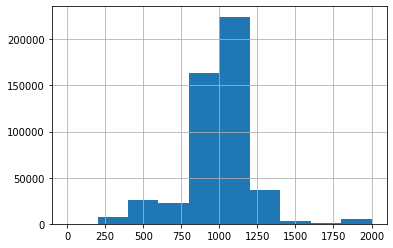

In [16]:
# hist distribution of IBI 

ibi_data['IBI'].hist()

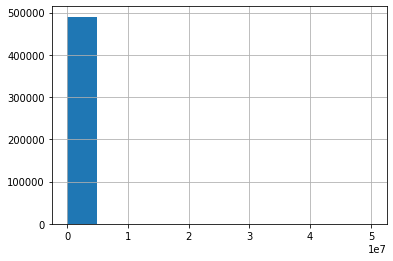

In [17]:
# hist distribution of Padded IBI 

ibi_data['Padded IBI'].hist()

# Motion Data

In [18]:
motion_data.head()

,Unix time,Date,Time,Motion seconds,NTC temp,Ring state,Motions low,Motions high,Regularity,Average Y,Average Z
0,1543340132,27.11.2018,9:35:32,6,37.69,3,7,1,0,256.0,-64.0
1,1543340162,27.11.2018,9:36:02,11,37.69,3,9,2,0,-8.0,-248.0
2,1543340192,27.11.2018,9:36:32,16,32.63,3,19,4,0,-256.0,-336.0
3,1543340222,27.11.2018,9:37:02,8,32.63,3,8,1,0,-152.0,-744.0
4,1543340252,27.11.2018,9:37:32,2,30.59,3,2,1,0,424.0,-472.0


In [19]:
# general statistics of each column in motion dataset
motion_data.describe()

,Unix time,Motion seconds,NTC temp,Ring state,Motions low,Motions high,Regularity,Average Y,Average Z
count,4.298500e+04,42985.000000,42985.000000,42985.000000,42985.000000,42985.000000,42985.000000,28092.000000,25116.000000
mean,1.543985e+09,6.337653,29.931200,3.904944,5.344562,0.582971,0.014493,-23.723195,-282.502628
std,3.723845e+05,7.783917,9.161379,1.520332,7.147680,1.683046,0.119514,418.408437,532.716672
min,1.543340e+09,-1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1024.000000,-1024.000000
25%,1.543663e+09,0.000000,27.820000,3.000000,0.000000,0.000000,0.000000,-224.000000,-768.000000
50%,1.543986e+09,2.000000,32.850000,3.000000,1.000000,0.000000,0.000000,0.000000,-328.000000
75%,1.544307e+09,12.000000,35.980000,6.000000,9.000000,0.000000,0.000000,192.000000,96.000000
max,1.544630e+09,30.000000,39.530000,6.000000,35.000000,46.000000,1.000000,1016.000000,1016.000000


In [20]:
# finding the type of each object
motion_data.dtypes

Unix time           int64
Date               object
Time               object
Motion seconds      int64
NTC temp          float64
Ring state          int64
Motions low         int64
Motions high        int64
Regularity          int64
Average Y         float64
Average Z         float64
dtype: object

In [21]:
# CHECKING WHY MOTION SECONDS IS -1; when NTC temp is 0 (or oura is off) motion seconds is -1
motion_data[motion_data['Motion seconds']==-1].shape,motion_data[motion_data['NTC temp']==0].shape

((2976, 11), (2976, 11))

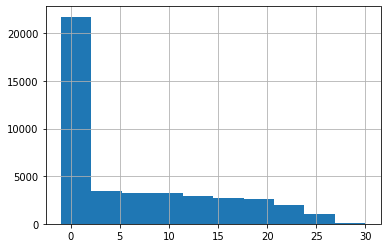

In [22]:
# histogram distribution of motion seconds
motion_data['Motion seconds'].hist()

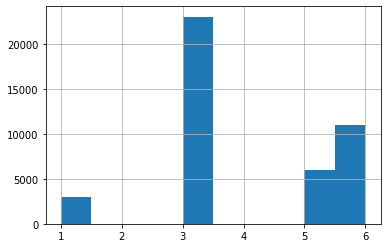

In [23]:
# histogram distribution of ring states
motion_data['Ring state'].hist()

In [24]:
# exploring what each state could possibly be 
motion_data['Ring state'].value_counts()

3    23071
6    10987
5     5939
1     2976
4       12
Name: Ring state, dtype: int64

In [25]:
# exploring what each ring state might be 
motion_data.groupby('Ring state')['Motion seconds'].describe()

,count,mean,std,min,25%,50%,75%,max
Ring state,,,,,,,,
1,2976.0,-1.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0
3,23071.0,11.222400,7.360045,0.0,5.0,11.0,17.0,30.0
4,12.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,5939.0,2.776225,4.621577,0.0,0.0,1.0,4.0,28.0
6,10987.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [26]:
# exploring what each ring state might be 
motion_data.groupby('Ring state')['NTC temp'].describe()

,count,mean,std,min,25%,50%,75%,max
Ring state,,,,,,,,
1,2976.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
3,23071.0,29.641650,3.733475,12.24,26.90,30.02,32.68,39.53
4,12.0,33.360000,2.965284,27.33,32.94,34.42,35.42,35.63
5,5939.0,35.238562,2.193936,16.31,35.04,35.96,36.33,37.09
6,10987.0,35.773914,2.065640,15.88,35.92,36.17,36.41,37.06


In [27]:
# exploring what each ring state might be 
motion_data.groupby('Ring state')['Motions low'].describe()

,count,mean,std,min,25%,50%,75%,max
Ring state,,,,,,,,
1,2976.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,23071.0,9.418361,7.344687,0.0,3.0,8.0,14.0,35.0
4,12.0,0.583333,0.900337,0.0,0.0,0.0,1.0,3.0
5,5939.0,2.091598,4.241533,0.0,0.0,0.0,2.0,31.0
6,10987.0,0.001456,0.038135,0.0,0.0,0.0,0.0,1.0


In [28]:
# exploring what each ring state might be 
motion_data.groupby('Ring state')['Motions high'].describe()

,count,mean,std,min,25%,50%,75%,max
Ring state,,,,,,,,
1,2976.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,23071.0,1.014477,2.150767,0.0,0.0,0.0,1.0,46.0
4,12.0,0.083333,0.288675,0.0,0.0,0.0,0.0,1.0
5,5939.0,0.276814,0.957229,0.0,0.0,0.0,0.0,13.0
6,10987.0,0.000819,0.028610,0.0,0.0,0.0,0.0,1.0


In [29]:
# exploring what each ring state might be 
motion_data.groupby('Ring state')['Average Y'].describe()

,count,mean,std,min,25%,50%,75%,max
Ring state,,,,,,,,
1,2976.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,21730.0,-35.572941,445.568924,-1024.0,-280.0,-8.0,208.0,1016.0
4,6.0,-112.000000,589.812173,-832.0,-446.0,-204.0,128.0,856.0
5,3356.0,31.098927,416.955258,-1024.0,-240.0,32.0,306.0,1016.0
6,24.0,119.666667,390.613193,-648.0,-146.0,200.0,372.0,928.0


In [30]:
# exploring what each ring state might be 
motion_data.groupby('Ring state')['Average Z'].describe()

,count,mean,std,min,25%,50%,75%,max
Ring state,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21730.0,-291.085504,512.901889,-1024.0,-760.0,-320.0,80.0,1016.0
4,6.0,-541.333333,476.753465,-904.0,-866.0,-692.0,-464.0,352.0
5,3356.0,-228.121573,641.654586,-1024.0,-824.0,-364.0,288.0,1016.0
6,24.0,-51.000000,818.984525,-1016.0,-826.0,-356.0,872.0,944.0


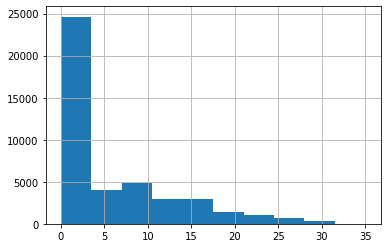

In [31]:
# histogram distribution of motions low
motion_data['Motions low'].hist()

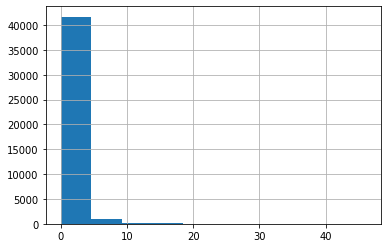

In [32]:
# histogram distribution of motions high
motion_data['Motions high'].hist()

In [33]:
# trying to find out why average Y is missing for some rows
motion_data[motion_data['Average Y'].isnull()]['Motion seconds'].value_counts()

0    14893
Name: Motion seconds, dtype: int64

In [34]:
# trying to find out why average Y is missing for some rows
motion_data[(motion_data['Motion seconds']==0)&(motion_data['Average Y'].notnull())].head()

,Unix time,Date,Time,Motion seconds,NTC temp,Ring state,Motions low,Motions high,Regularity,Average Y,Average Z
190,1543345831,27.11.2018,11:10:31,0,25.20,3,1,0,0,-32.0,-704.0
653,1543359721,27.11.2018,15:02:01,0,33.61,3,1,0,0,-24.0,-808.0
667,1543360141,27.11.2018,15:09:01,0,34.12,4,1,0,0,-64.0,-824.0
721,1543361760,27.11.2018,15:36:00,0,32.43,3,1,0,0,-168.0,-632.0
1523,1543385822,27.11.2018,22:17:02,0,25.04,3,1,0,0,0.0,-1024.0


In [35]:
# trying to find out why average Z is missing for some rows
motion_data[(motion_data['Average Z'].isnull())]['Motion seconds'].value_counts()

 0    14893
-1     2976
Name: Motion seconds, dtype: int64

In [36]:
# trying to find out why average Z is missing for some rows
motion_data[(motion_data['Average Y'].notnull())&(motion_data['Average Z'].isnull())].shape

(2976, 11)

# Sleep Data

In [37]:
def sleep_dataset_reader(str_dataset):
    ''' This function takes a string of location of sleep csv and properly formats it to be read as a dataframe.
    Parameters: String, which is the location of the sleep dataset
    Returns: Returns a dataframe with proper format; dataframe does not extend past header columns
    '''
    test = open('scripps1_sleep.csv','r')
    lines = test.readlines()
    length_lines = [len(x.strip().split(';')) for x in lines]
    columns = max(length_lines) 
    list_rows = [] 
    list_sleep_phases = [] 
    for i in lines: 
        list_rows.append(i.strip().split(';'))
        list_sleep_phases.append(i.strip().split(';')[39:])
    list_rows[0].extend(range(len(list_rows[0])-39,columns-39))
    list_rows[0] = list(map(str, list_rows[0]))
    for row in list_rows:
            row.extend(np.nan for x in range(columns-len(row))) # extends rows; for some, 'sleep cycle max' is less than 899
    headers = list_rows.pop(0)
    df = pd.DataFrame(list_rows,columns = headers,dtype='float')
    df.replace(r'^\s*$', np.nan, regex=True, inplace = True) # replaces all the empty spaces with NaN 
    df['list_numbers'] = list_sleep_phases[1:]
    return df

In [38]:
df = sleep_dataset_reader('scripps1_sleep.csv')

In [39]:
df.head()

,Date,Bedtime start Unix,Bedtime end Unix,Bedtime start,Bedtime end,TimeZone,Debug info,Battery consumption,Is longest,Time in bed,...,1731,1732,1733,1734,1735,1736,1737,1738,1739,list_numbers
0,27.11.2018,1.543351e+09,1.543352e+09,12:35:53,12:49:53,-8.0,NaN,NaN,1.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, ..."
1,27.11.2018,1.543368e+09,1.543369e+09,17:17:55,17:37:55,-8.0,NaN,NaN,1.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
2,28.11.2018,1.543386e+09,1.543419e+09,22:16:15,7:32:15,-8.0,NaN,1.2%,1.0,556.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
3,28.11.2018,1.543438e+09,1.543440e+09,12:52:26,13:12:26,-8.0,NaN,NaN,0.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, ..."
4,29.11.2018,1.543463e+09,1.543464e+09,19:44:43,19:54:43,-8.0,NaN,NaN,1.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [40]:
bedtime_issues = df[df['Debug info']=='Bedtime detection failed']
df = df[df['Debug info']!='Bedtime detection failed']

In [41]:
potential_sleep_cycles = df.iloc[:,39:df.shape[1]-1]
potential_sleep_cycles.head()

,0,1,2,3,4,5,6,7,8,9,...,1730,1731,1732,1733,1734,1735,1736,1737,1738,1739
0,4,4,4,4.0,4.0,4.0,4.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,4,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,4,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,4,4.0,4.0,4.0,4.0,4.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,4,4.0,4.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
columnized_sleep_cycles = potential_sleep_cycles.apply(pd.to_numeric)

In [43]:
# why are some rows not being converted into numbers? something with battery detection error 

In [44]:
overall_sleep_cycles = df['list_numbers']

In [45]:
no_sleep_cycles_df = df.iloc[:,:39]
no_sleep_cycles_df.columns

Index(['Date', 'Bedtime start Unix', 'Bedtime end Unix', 'Bedtime start',
       'Bedtime end', 'TimeZone', 'Debug info', 'Battery consumption',
       'Is longest', 'Time in bed', 'Sleep Score', 'Sleep minutes',
       'Wake minutes', 'REM minutes', 'Light minutes', 'Deep minutes',
       'Efficiency', 'Lowest HR time minutes', 'Lowest HR', 'Wake-up count',
       'Sleep latency', 'breath', 'breath_v', 'Average HR', 'SleepMidPoint',
       'Temperature', '', 'Restless%', 'Got up count', '', 'Score Total',
       'Score Deep', 'Score REM', ' Score Efficiency', ' Score Latancy',
       ' Score Disturbances', 'Score Alignment', 'FW version', 'Sleep phases'],
      dtype='object')

In [46]:
no_sleep_cycles_df.dtypes

Date                       object
Bedtime start Unix        float64
Bedtime end Unix          float64
Bedtime start              object
Bedtime end                object
TimeZone                  float64
Debug info                 object
Battery consumption        object
Is longest                float64
Time in bed               float64
Sleep Score               float64
Sleep minutes             float64
Wake minutes              float64
REM minutes               float64
Light minutes             float64
Deep minutes              float64
Efficiency                float64
Lowest HR time minutes    float64
Lowest HR                 float64
Wake-up count             float64
Sleep latency             float64
breath                    float64
breath_v                  float64
Average HR                float64
SleepMidPoint              object
Temperature               float64
                          float64
Restless%                  object
Got up count              float64
              

In [47]:
no_sleep_cycles_df['Bedtime start Unix'].describe()

count    3.500000e+01
mean     1.543944e+09
std      4.187409e+05
min      1.543351e+09
25%      1.543556e+09
50%      1.543905e+09
75%      1.544345e+09
max      1.544599e+09
Name: Bedtime start Unix, dtype: float64

In [48]:
no_sleep_cycles_df.iloc[:,:10].drop(['Debug info','Battery consumption','Date','TimeZone'],axis =1).groupby(
    'Is longest').describe().T

Is longest                         0.0           1.0
Bedtime start Unix count  1.100000e+01  2.400000e+01
                   mean   1.544068e+09  1.543887e+09
                   std    4.321125e+05  4.089507e+05
                   min    1.543438e+09  1.543351e+09
                   25%    1.543741e+09  1.543532e+09
                   50%    1.544045e+09  1.543809e+09
                   75%    1.544520e+09  1.544276e+09
                   max    1.544569e+09  1.544599e+09
Bedtime end Unix   count  1.100000e+01  2.400000e+01
                   mean   1.544069e+09  1.543907e+09
                   std    4.320043e+05  4.135963e+05
                   min    1.543440e+09  1.543352e+09
                   25%    1.543743e+09  1.543541e+09
                   50%    1.544046e+09  1.543825e+09
                   75%    1.544521e+09  1.544298e+09
                   max    1.544571e+09  1.544629e+09
Time in bed        count  1.100000e+01  2.400000e+01
                   mean   1.863636e+01  3.305000e+02
                   std    1.183446e+01  2.350584e+02
                   min    3.000000e+00  1.000000e+01
                   25%    1.100000e+01  4.550000e+01
                   50%    1.600000e+01  4.785000e+02
                   75%    2.250000e+01  5.157500e+02
                   max    4.500000e+01  5.790000e+02

In [49]:
no_sleep_cycles_df[no_sleep_cycles_df['Date']==no_sleep_cycles_df['Date'].unique()[0]]

,Date,Bedtime start Unix,Bedtime end Unix,Bedtime start,Bedtime end,TimeZone,Debug info,Battery consumption,Is longest,Time in bed,...,,Score Total,Score Deep,Score REM,Score Efficiency,Score Latancy,Score Disturbances,Score Alignment,FW version,Sleep phases
0,27.11.2018,1.543351e+09,1.543352e+09,12:35:53,12:49:53,-8.0,NaN,NaN,1.0,14.0,...,NaN,1,1,1,1,76,99,1,NaN,NaN
1,27.11.2018,1.543368e+09,1.543369e+09,17:17:55,17:37:55,-8.0,NaN,NaN,1.0,20.0,...,NaN,1,1,1,1,76,99,1,NaN,NaN


In [50]:
no_sleep_cycles_df.describe().T.iloc[3:]

,count,mean,std,min,25%,50%,75%,max
Is longest,35.0,0.685714,0.471008,0.000,0.0000,1.000,1.0000,1.000
Time in bed,35.0,232.485714,242.888061,3.000,20.0000,46.000,498.0000,579.000
Sleep Score,35.0,48.542857,30.946199,0.000,23.0000,26.000,83.0000,94.000
Sleep minutes,35.0,189.342857,221.686443,0.000,0.0000,9.000,427.0000,514.000
Wake minutes,35.0,43.514286,41.434123,3.000,12.0000,39.000,53.0000,223.000
REM minutes,35.0,61.942857,80.790922,0.000,0.0000,0.000,131.0000,218.000
Light minutes,35.0,97.885714,116.019971,0.000,0.0000,8.000,203.0000,330.000
Deep minutes,35.0,29.685714,36.049616,0.000,0.0000,0.000,65.5000,96.000
Efficiency,35.0,44.400000,40.491975,0.000,0.0000,48.000,87.0000,97.000
Lowest HR time minutes,35.0,49.942857,81.559052,0.000,8.0000,20.000,38.0000,406.000


In [51]:
no_sleep_cycles_df[no_sleep_cycles_df['Sleep Score']==0].T

,34
Date,11.12.2018
Bedtime start Unix,1.54457e+09
Bedtime end Unix,1.54457e+09
Bedtime start,14:34:31
Bedtime end,14:37:31
TimeZone,-8
Debug info,NaN
Battery consumption,NaN
Is longest,0
Time in bed,3


In [52]:
pd.to_datetime(df['SleepMidPoint'], format='%H:%M').sort_values()

30   1900-01-01 02:07:00
15   1900-01-01 02:10:00
23   1900-01-01 02:11:00
6    1900-01-01 02:15:00
17   1900-01-01 02:23:00
19   1900-01-01 02:39:00
9    1900-01-01 02:41:00
21   1900-01-01 02:49:00
2    1900-01-01 03:00:00
32   1900-01-01 03:08:00
36   1900-01-01 03:11:00
25   1900-01-01 03:18:00
12   1900-01-01 03:33:00
13   1900-01-01 04:36:00
27   1900-01-01 04:57:00
18   1900-01-01 12:17:00
16   1900-01-01 12:18:00
0    1900-01-01 12:41:00
7    1900-01-01 12:57:00
3    1900-01-01 13:00:00
31   1900-01-01 13:12:00
22   1900-01-01 13:15:00
20   1900-01-01 13:22:00
33   1900-01-01 13:26:00
10   1900-01-01 14:11:00
34   1900-01-01 14:34:00
35   1900-01-01 14:49:00
1    1900-01-01 17:17:00
14   1900-01-01 17:33:00
4    1900-01-01 19:44:00
29   1900-01-01 20:05:00
8    1900-01-01 20:25:00
5    1900-01-01 20:28:00
11   1900-01-01 20:40:00
26   1900-01-01 23:39:00
Name: SleepMidPoint, dtype: datetime64[ns]

In [53]:
no_sleep_cycles_df['Restless%'].dropna()#.sort_values().shape

0     102
2      38
3      86
6      42
7      66
9      41
10     94
12     44
13     41
15     45
16     77
17     40
18      2
19     41
21     40
22     39
23     33
25     43
27     40
30     45
32     45
36     39
Name: Restless%, dtype: object

In [54]:
no_sleep_cycles_df['Score Total'].dropna()

0      1
1      1
2     97
3      1
4      1
5      1
6     73
7      1
8      1
9     84
10     1
11     1
12    86
13    96
14     1
15    94
16     1
17    77
18     1
19    89
20     1
21    82
22     1
23    66
25    75
26     1
27    51
29     1
30    78
31     1
32    60
33     1
35     1
36    87
Name: Score Total, dtype: object

In [55]:
no_sleep_cycles_df.iloc[:,30:37].dropna().astype(int).describe()

,Score Total,Score Deep,Score REM,Score Efficiency,Score Latancy,Score Disturbances,Score Alignment
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,35.705882,34.382353,40.000000,40.558824,83.617647,88.852941,44.558824
std,40.572815,39.453859,45.758258,43.254841,8.312148,11.481559,45.499378
min,1.000000,1.000000,1.000000,1.000000,76.000000,66.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,76.000000,77.250000,1.000000
50%,1.000000,1.000000,1.000000,20.000000,81.500000,99.000000,15.000000
75%,77.750000,74.250000,98.250000,88.000000,90.000000,99.000000,98.750000
max,97.000000,96.000000,100.000000,100.000000,98.000000,99.000000,100.000000


In [56]:
no_sleep_cycles_df['Restless%'].dropna().astype(int).describe()

count     22.000000
mean      49.227273
std       22.523917
min        2.000000
25%       40.000000
50%       41.500000
75%       45.000000
max      102.000000
Name: Restless%, dtype: float64

In [57]:
columnized_sleep_cycles.head()

,0,1,2,3,4,5,6,7,8,9,...,1730,1731,1732,1733,1734,1735,1736,1737,1738,1739
0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
overall_sleep_cycles.apply(len)

0       45
1       63
2     1671
3       63
4       33
5      141
6     1440
7       51
8      135
9     1575
10      99
11     243
12    1497
13    1695
14     120
15    1542
16      69
17    1500
18      39
19    1581
20      42
21    1674
22      72
23    1437
25    1410
26     159
27    1059
29     135
30    1476
31      30
32    1740
33      33
34       3
35     138
36    1497
Name: list_numbers, dtype: int64

In [59]:
overall_sleep_cycles[1][0:41]

['4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '']

In [60]:
no_sleep_cycles_df['Time in bed']

0      14.0
1      20.0
2     556.0
3      20.0
4      10.0
5      46.0
6     479.0
7      16.0
8      44.0
9     524.0
10     32.0
11     80.0
12    498.0
13    564.0
14     39.0
15    513.0
16     22.0
17    499.0
18     12.0
19    526.0
20     13.0
21    557.0
22     23.0
23    478.0
25    469.0
26     52.0
27    352.0
29     44.0
30    491.0
31      9.0
32    579.0
33     10.0
34      3.0
35     45.0
36    498.0
Name: Time in bed, dtype: float64

In [61]:
set([j for i in overall_sleep_cycles.tolist() for j in i])

{'', '1', '100', '2', '200', '3', '300', '4', '400'}

In [62]:
columnized_sleep_cycles.iloc[:,30:40]

,30,31,32,33,34,35,36,37,38,39
0,400.0,400.0,400.0,400.0,200.0,200.0,200.0,200.0,100.0,100.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,4.0,4.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
6,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
7,1.0,1.0,NaN,NaN,400.0,200.0,200.0,200.0,200.0,200.0
8,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
9,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [63]:
overall_sleep_cycles.ap

AttributeError: 'Series' object has no attribute 'ap'

In [64]:
len(overall_sleep_cycles.tolist())

35

In [65]:
len(no_sleep_cycles_df['Time in bed'].tolist())

35

In [66]:
single_digits = [] 
for i in range(35): 
    #print(int(no_sleep_cycles_df['Time in bed'].tolist()[i]))
    single_digits.append(overall_sleep_cycles.tolist()[i][:2*(
        int(no_sleep_cycles_df['Time in bed'].tolist()[i]))]) 

In [47]:
triple_digits = [] 
for i in range(35):
    triple_digits.append(overall_sleep_cycles.tolist()[i][2*(
        int(no_sleep_cycles_df['Time in bed'].tolist()[i]))+2:-1])

In [58]:
triple_digits[1]

['400',
 '400',
 '400',
 '400',
 '400',
 '400',
 '400',
 '400',
 '400',
 '400',
 '400',
 '400',
 '400',
 '400',
 '100',
 '100',
 '100',
 '100',
 '100',
 '100']

In [57]:
single_digits[1]

['4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1']